In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from glob import glob
import pandas as pd
from ramslibs.data_tools import flist_to_times, create_xr_metadata

In [3]:
data_oli = xr.open_dataset('../data/model/oliktok.nc')

In [4]:
data_ascos = xr.open_dataset('../data/model/ascos.nc')

In [5]:
data_greenland = xr.open_dataset('../data/model/summit.nc')

In [6]:
rcp_oli = data_oli.RCP.load() * 1e3
rcp_ascos = data_ascos.RCP.load() * 1e3
rcp_greenland = data_greenland.RCP.load() * 1e3

rip_oli = (data_oli.RAP + data_oli.RPP + data_oli.RSP).load() * 1e3
rip_ascos = (data_ascos.RAP + data_ascos.RPP + data_ascos.RSP).load() * 1e3
rip_greenland = (data_greenland.RAP + data_greenland.RPP + data_greenland.RSP).load() * 1e3


In [7]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [8]:
from datetime import datetime, timezone
t_oli = datetime(2017,5,12,9,tzinfo=timezone.utc)
t_ascos = datetime(2008,8,31,6,tzinfo=timezone.utc)
t_smt = datetime(2019,7,2,6,tzinfo=timezone.utc)
t = [t_oli, t_ascos, t_smt]

In [9]:
oli_lims = (datetime(2017,5,12,3), datetime(2017,5,12,18), 0, 1000)
ascos_lims = (datetime(2008,8,31,0), datetime(2008,8,31,15), 0, 1200)
smt_lims = (datetime(2019,7,2,0), datetime(2019,7,2,12), 0, 1700)


/var/folders/g9/qqywy9zd20dcp36_ycz2hv1m0000gn/T/ipykernel_25670/170533303.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(major_tickalabels, rotation=0, horizontalalignment='center')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


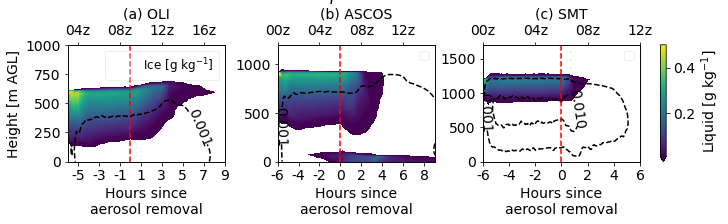

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(10,3), constrained_layout=True)

plts = [[rcp_oli, rip_oli, '(a) OLI', oli_lims],
        [rcp_ascos, rip_ascos, '(b) ASCOS', ascos_lims],
        [rcp_greenland, rip_greenland, '(c) SMT', smt_lims]]

for ax, (rcp, rip, title, lims), aero_time in zip(axs, plts, t):
    
    # aero_time = rcp.time[0].values + np.timedelta64(6,'h')
    t1, t2, y1, y2 = lims

    cbar = True if title == '(c) SMT' else False
    label = True if title == '(a) OLI' else False
    
    cbar_kwargs = dict(label='Liquid [g kg$^{-1}$]') if title == '(c) SMT' else None
    
    c = rcp.where(rcp >= 0.001).plot.pcolormesh('time', 'z', ax=ax, vmin=0.01, vmax=0.5, add_colorbar=cbar, cbar_kwargs=cbar_kwargs)
    i = rip.plot.contour('time', 'z', levels=[0.01, 0.001],colors = 'k', linestyles='dashed', ax=ax)

    
    # c.collections[0].set_label('Modeled Liq')
    if label:
        i.collections[0].set_label('Ice [g kg$^{-1}$]')
    

    # ob = cbh.plot(ax=ax, color='C0', label='CBH Obs')

    # ax.clabel(c, c.levels, inline=True)
    axb = ax.twiny()
    
    ax.set_xlim(t1, t2)
    axb.set_xlim(t1, t2)
    
    time_ticks = ax.get_xticks()
    major_tickalabels = (np.asarray(mdates.num2date(time_ticks)) - aero_time).astype('timedelta64[h]').astype(int)

    axb.set_xticks(ax.get_xticks()[::2])
    axb.set_xticklabels([i.strftime('%Hz') for i in mdates.num2date(time_ticks[::2])])
    ax.set_xticklabels(major_tickalabels, rotation=0, horizontalalignment='center')

    ax.set_ylim(y1,y2)
    
    ax.clabel(i, i.levels, inline=True)
    
    ax.set_xlabel('Hours since\naerosol removal')

    ax.legend(loc='upper right', framealpha=0.3)
    
    ax.axvline(aero_time, color='r', linestyle='dashed')
    
    # ax.set_xticks(time_ticks)
    # ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(title)
    
    
    

axs[0].set_ylabel('Height [m AGL]')

# plt.savefig('contours.png', facecolor='w')